# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? *Note: There is no 100% right answer, make sure to watch the video for thoughts.*

----

## Imports and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('CIA_Country_Facts.csv')

In [3]:
df.shape

(227, 20)

In [4]:
df.head()

Country                               Region  Population  \
0     Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1         Albania  EASTERN EUROPE                          3581655   
2         Algeria  NORTHERN AFRICA                        32930091   
3  American Samoa  OCEANIA                                   57794   
4         Andorra  WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34        0.380     0.240    0.380  
1      15.11       5.22        0.232     0.188    0.579  
2      17.14       4.61        0.101     0.600    0.298  
3      22.46       3.27          NaN       NaN      NaN  
4       8.71       6.25          NaN       NaN      NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [7]:
df.describe().transpose()

count          mean           std  \
Population                          227.0  2.874028e+07  1.178913e+08   
Area (sq. mi.)                      227.0  5.982270e+05  1.790282e+06   
Pop. Density (per sq. mi.)          227.0  3.790471e+02  1.660186e+03   
Coastline (coast/area ratio)        227.0  2.116533e+01  7.228686e+01   
Net migration                       224.0  3.812500e-02  4.889269e+00   
Infant mortality (per 1000 births)  224.0  3.550696e+01  3.538990e+01   
GDP ($ per capita)                  226.0  9.689823e+03  1.004914e+04   
Literacy (%)                        209.0  8.283828e+01  1.972217e+01   
Phones (per 1000)                   223.0  2.360614e+02  2.279918e+02   
Arable (%)                          225.0  1.379711e+01  1.304040e+01   
Crops (%)                           225.0  4.564222e+00  8.361470e+00   
Other (%)                           225.0  8.163831e+01  1.614083e+01   
Climate                             205.0  2.139024e+00  6.993968e-01   
Birthrate                           224.0  2.211473e+01  1.117672e+01   
Deathrate                           223.0  9.241345e+00  4.990026e+00   
Agriculture                         212.0  1.508443e-01  1.467980e-01   
Industry                            211.0  2.827109e-01  1.382722e-01   
Service                             212.0  5.652830e-01  1.658410e-01   

                                         min           25%          50%  \
Population                          7026.000  437624.00000  4786994.000   
Area (sq. mi.)                         2.000    4647.50000    86600.000   
Pop. Density (per sq. mi.)             0.000      29.15000       78.800   
Coastline (coast/area ratio)           0.000       0.10000        0.730   
Net migration                        -20.990      -0.92750        0.000   
Infant mortality (per 1000 births)     2.290       8.15000       21.000   
GDP ($ per capita)                   500.000    1900.00000     5550.000   
Literacy (%)                          17.600      70.60000       92.500   
Phones (per 1000)                      0.200      37.80000      176.200   
Arable (%)                             0.000       3.22000       10.420   
Crops (%)                              0.000       0.19000        1.030   
Other (%)                             33.330      71.65000       85.700   
Climate                                1.000       2.00000        2.000   
Birthrate                              7.290      12.67250       18.790   
Deathrate                              2.290       5.91000        7.840   
Agriculture                            0.000       0.03775        0.099   
Industry                               0.020       0.19300        0.272   
Service                                0.062       0.42925        0.571   

                                             75%           max  
Population                          1.749777e+07  1.313974e+09  
Area (sq. mi.)                      4.418110e+05  1.707520e+07  
Pop. Density (per sq. mi.)          1.901500e+02  1.627150e+04  
Coastline (coast/area ratio)        1.034500e+01  8.706600e+02  
Net migration                       9.975000e-01  2.306000e+01  
Infant mortality (per 1000 births)  5.570500e+01  1.911900e+02  
GDP ($ per capita)                  1.570000e+04  5.510000e+04  
Literacy (%)                        9.800000e+01  1.000000e+02  
Phones (per 1000)                   3.896500e+02  1.035600e+03  
Arable (%)                          2.000000e+01  6.211000e+01  
Crops (%)                           4.440000e+00  5.068000e+01  
Other (%)                           9.544000e+01  1.000000e+02  
Climate                             3.000000e+00  4.000000e+00  
Birthrate                           2.982000e+01  5.073000e+01  
Deathrate                           1.060500e+01  2.974000e+01  
Agriculture                         2.210000e-01  7.690000e-01  
Industry                            3.410000e-01  9.060000e-01  
Service                             6.785000e-01  9.

# Exploratory Data Analysis

Let's create some visualizations. Please feel free to expand on these with your own analysis and charts!

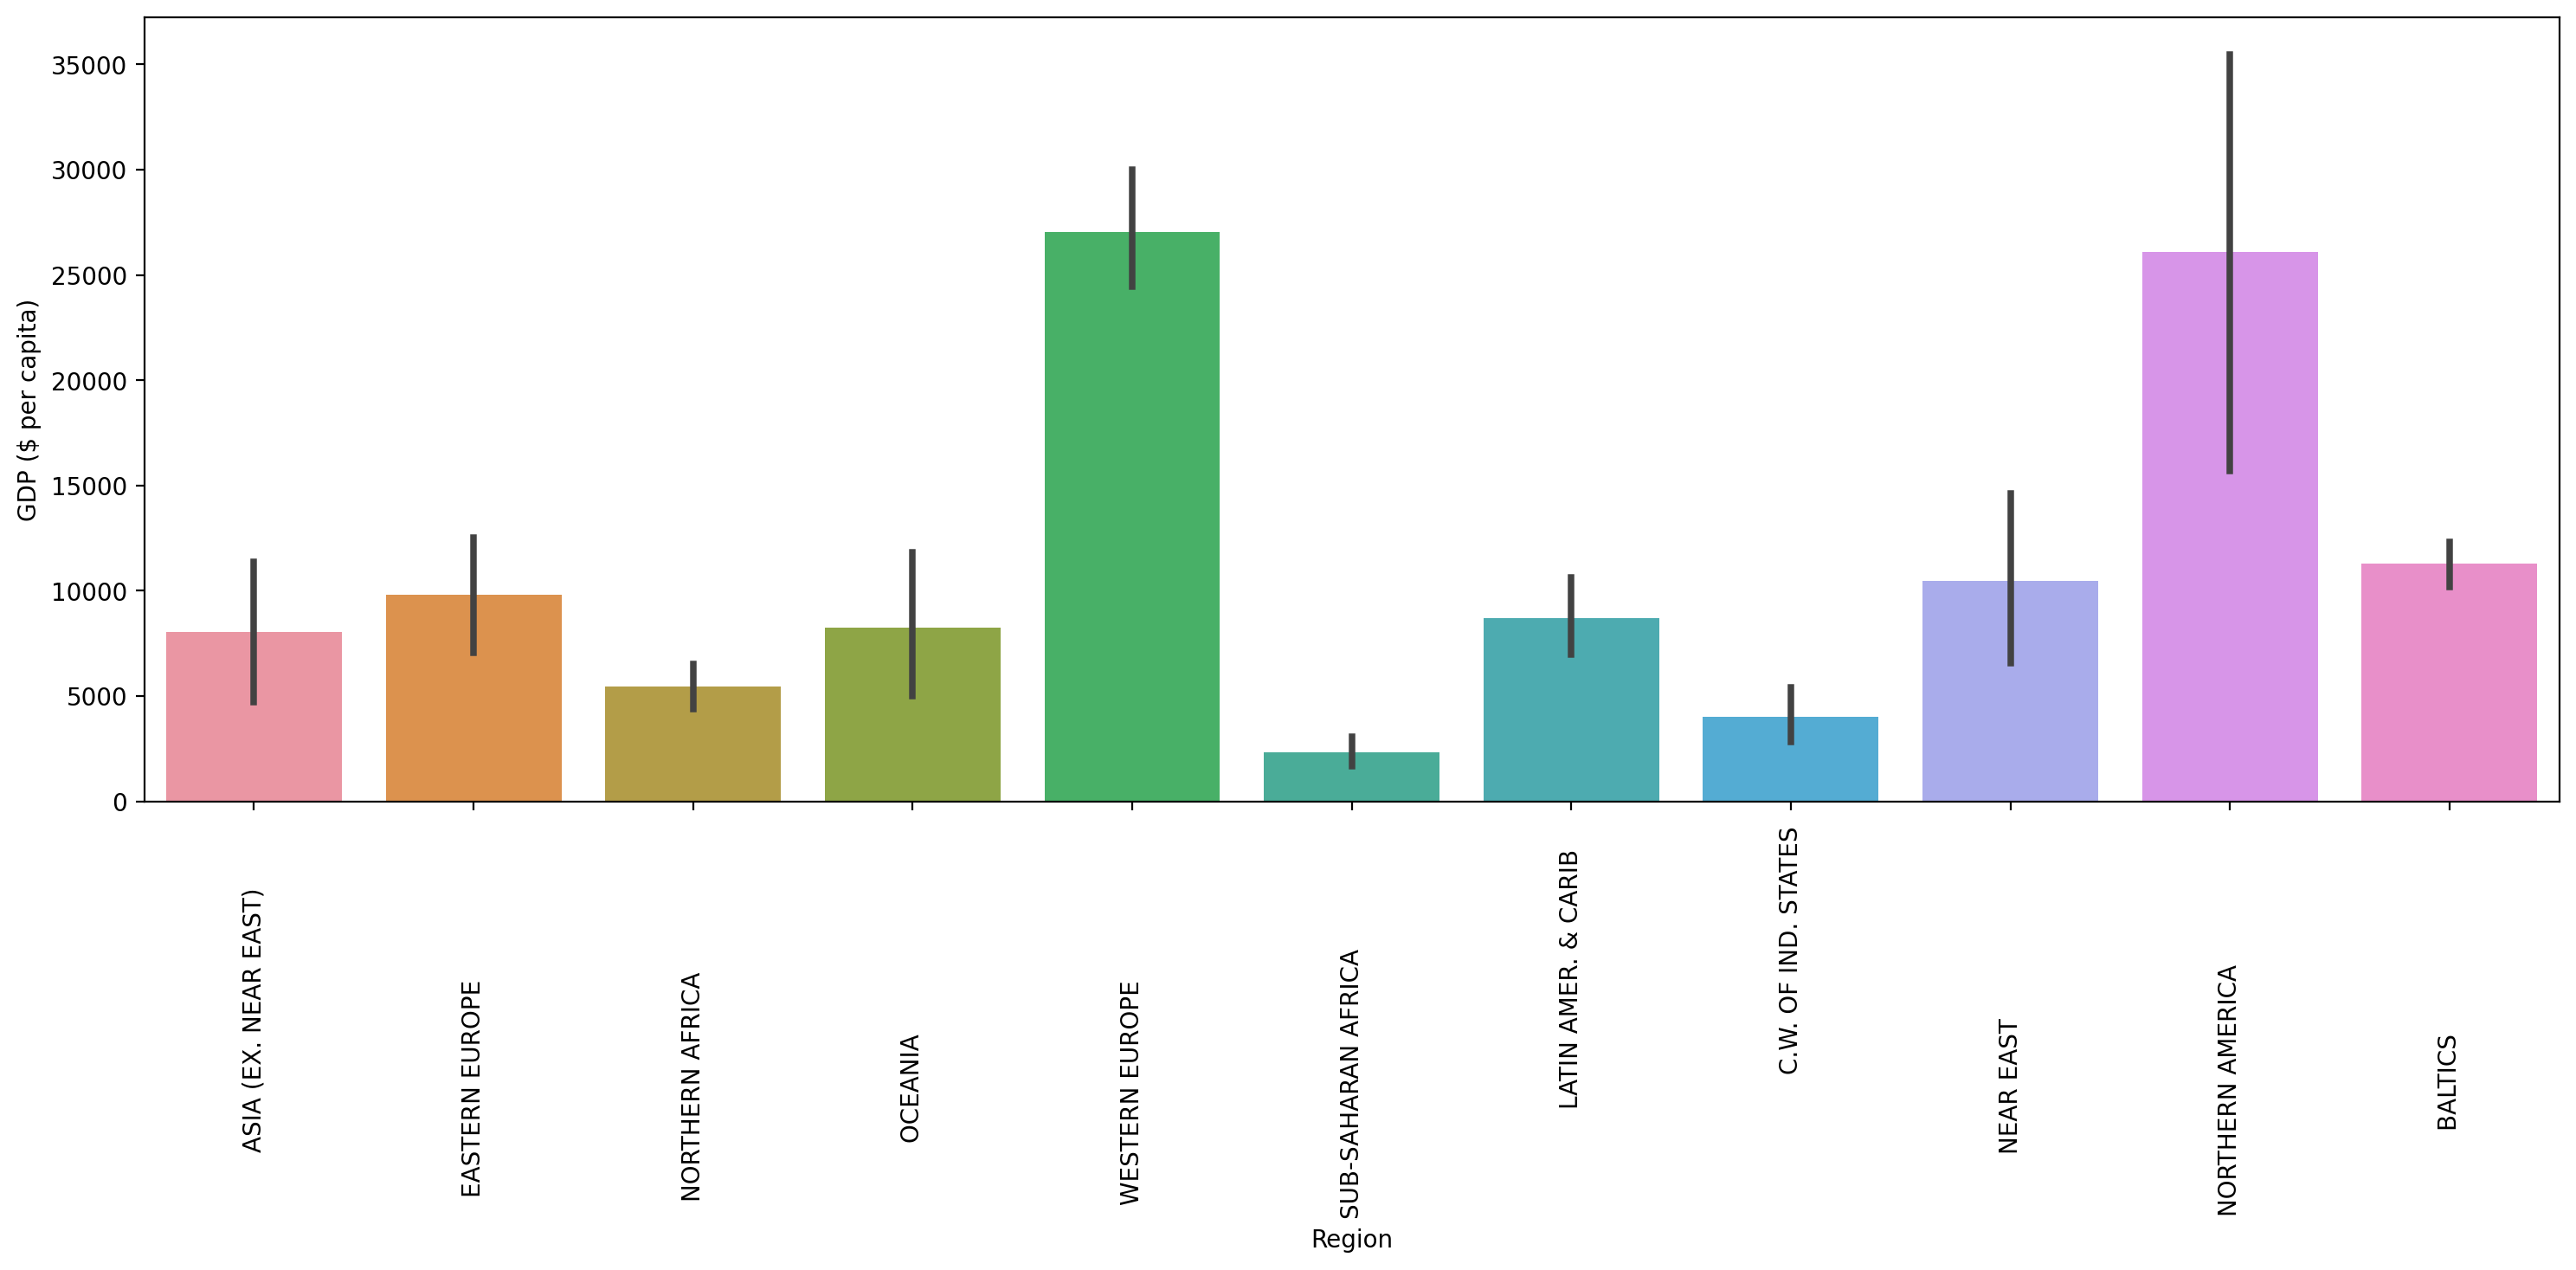

In [8]:
plt.figure(figsize=(18,6),dpi=200)
sns.barplot(data=df,x='Region',y='GDP ($ per capita)')
plt.xticks(rotation=90);

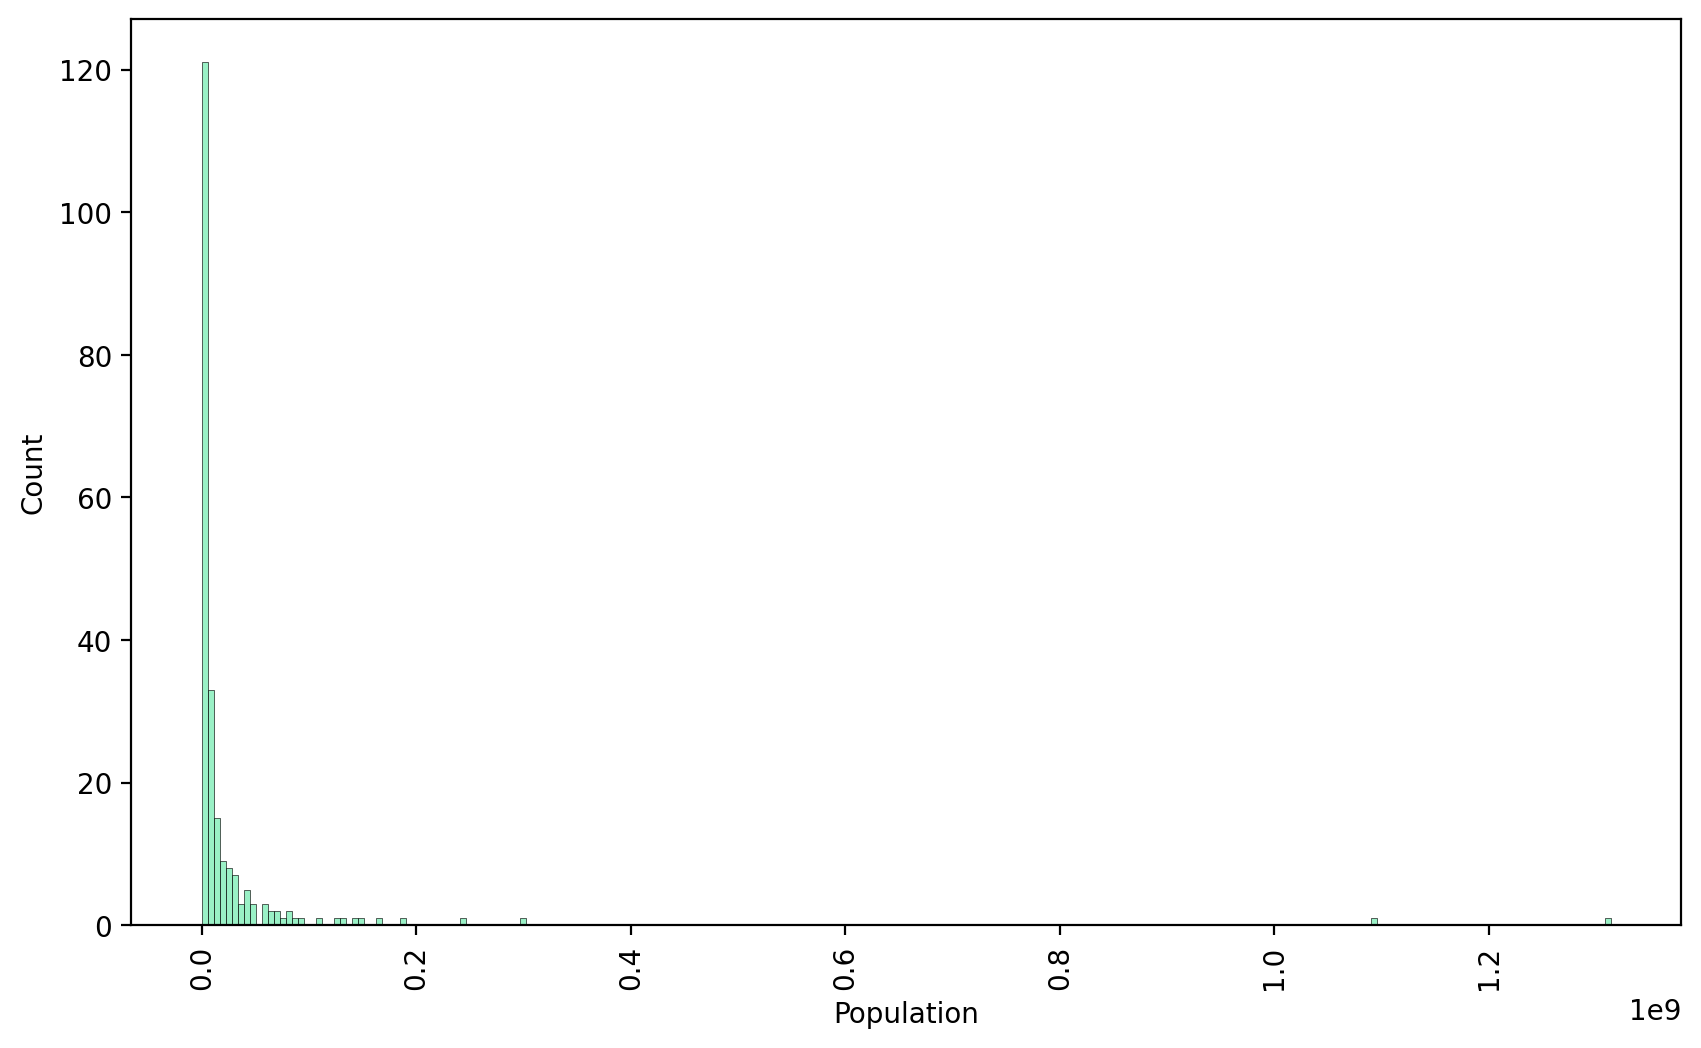

In [9]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(data=df,x='Population',color='#79edb3')
plt.xticks(rotation=90);

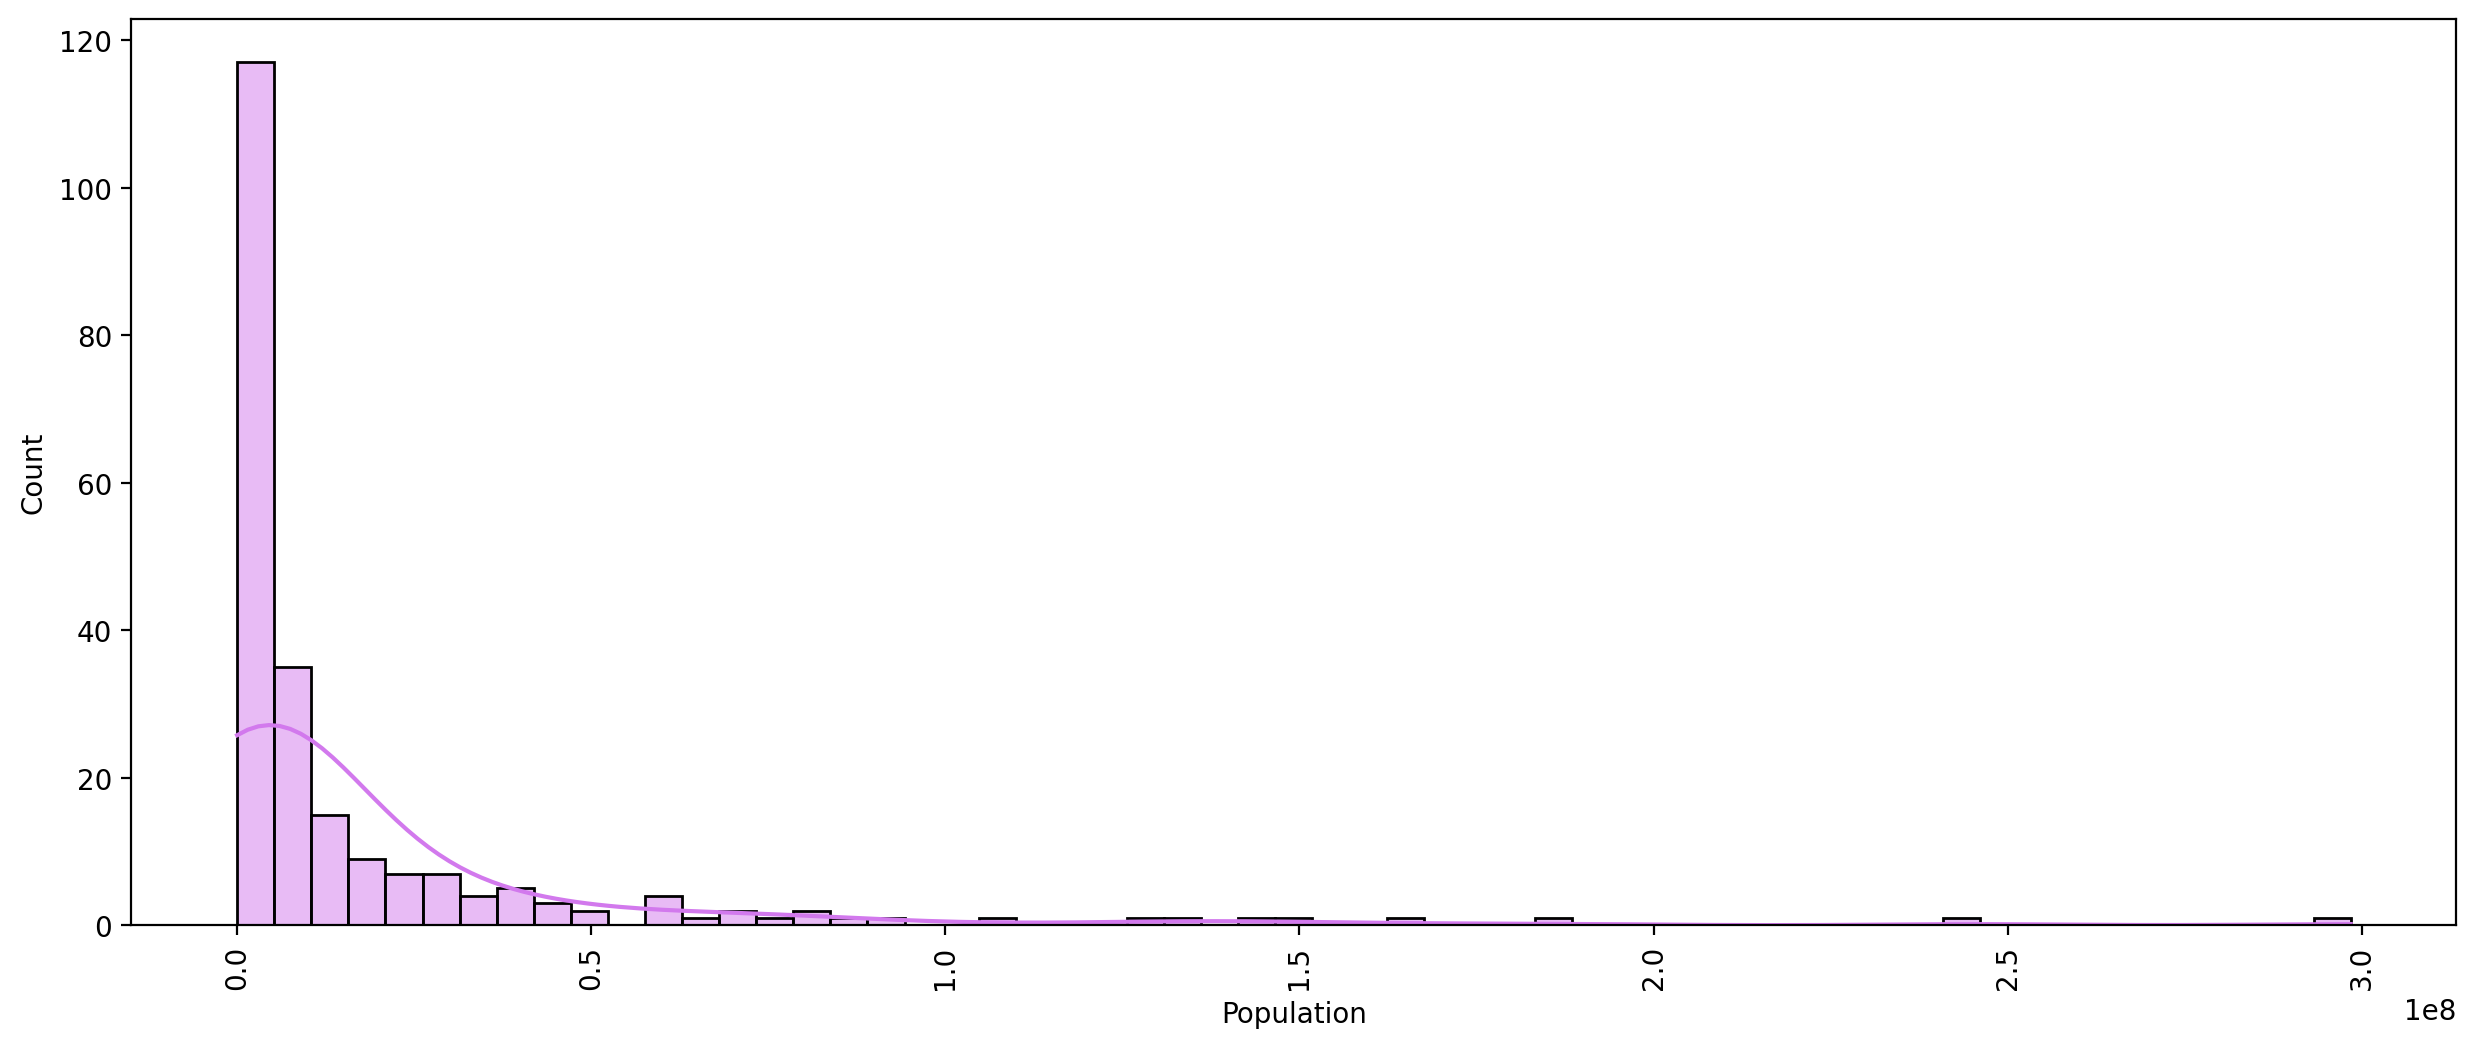

In [10]:
plt.figure(figsize=(15,6),dpi=200)
sns.histplot(data=df[df['Population']<500000000],x='Population',color='#d279ed',kde=True)
plt.xticks(rotation=90);

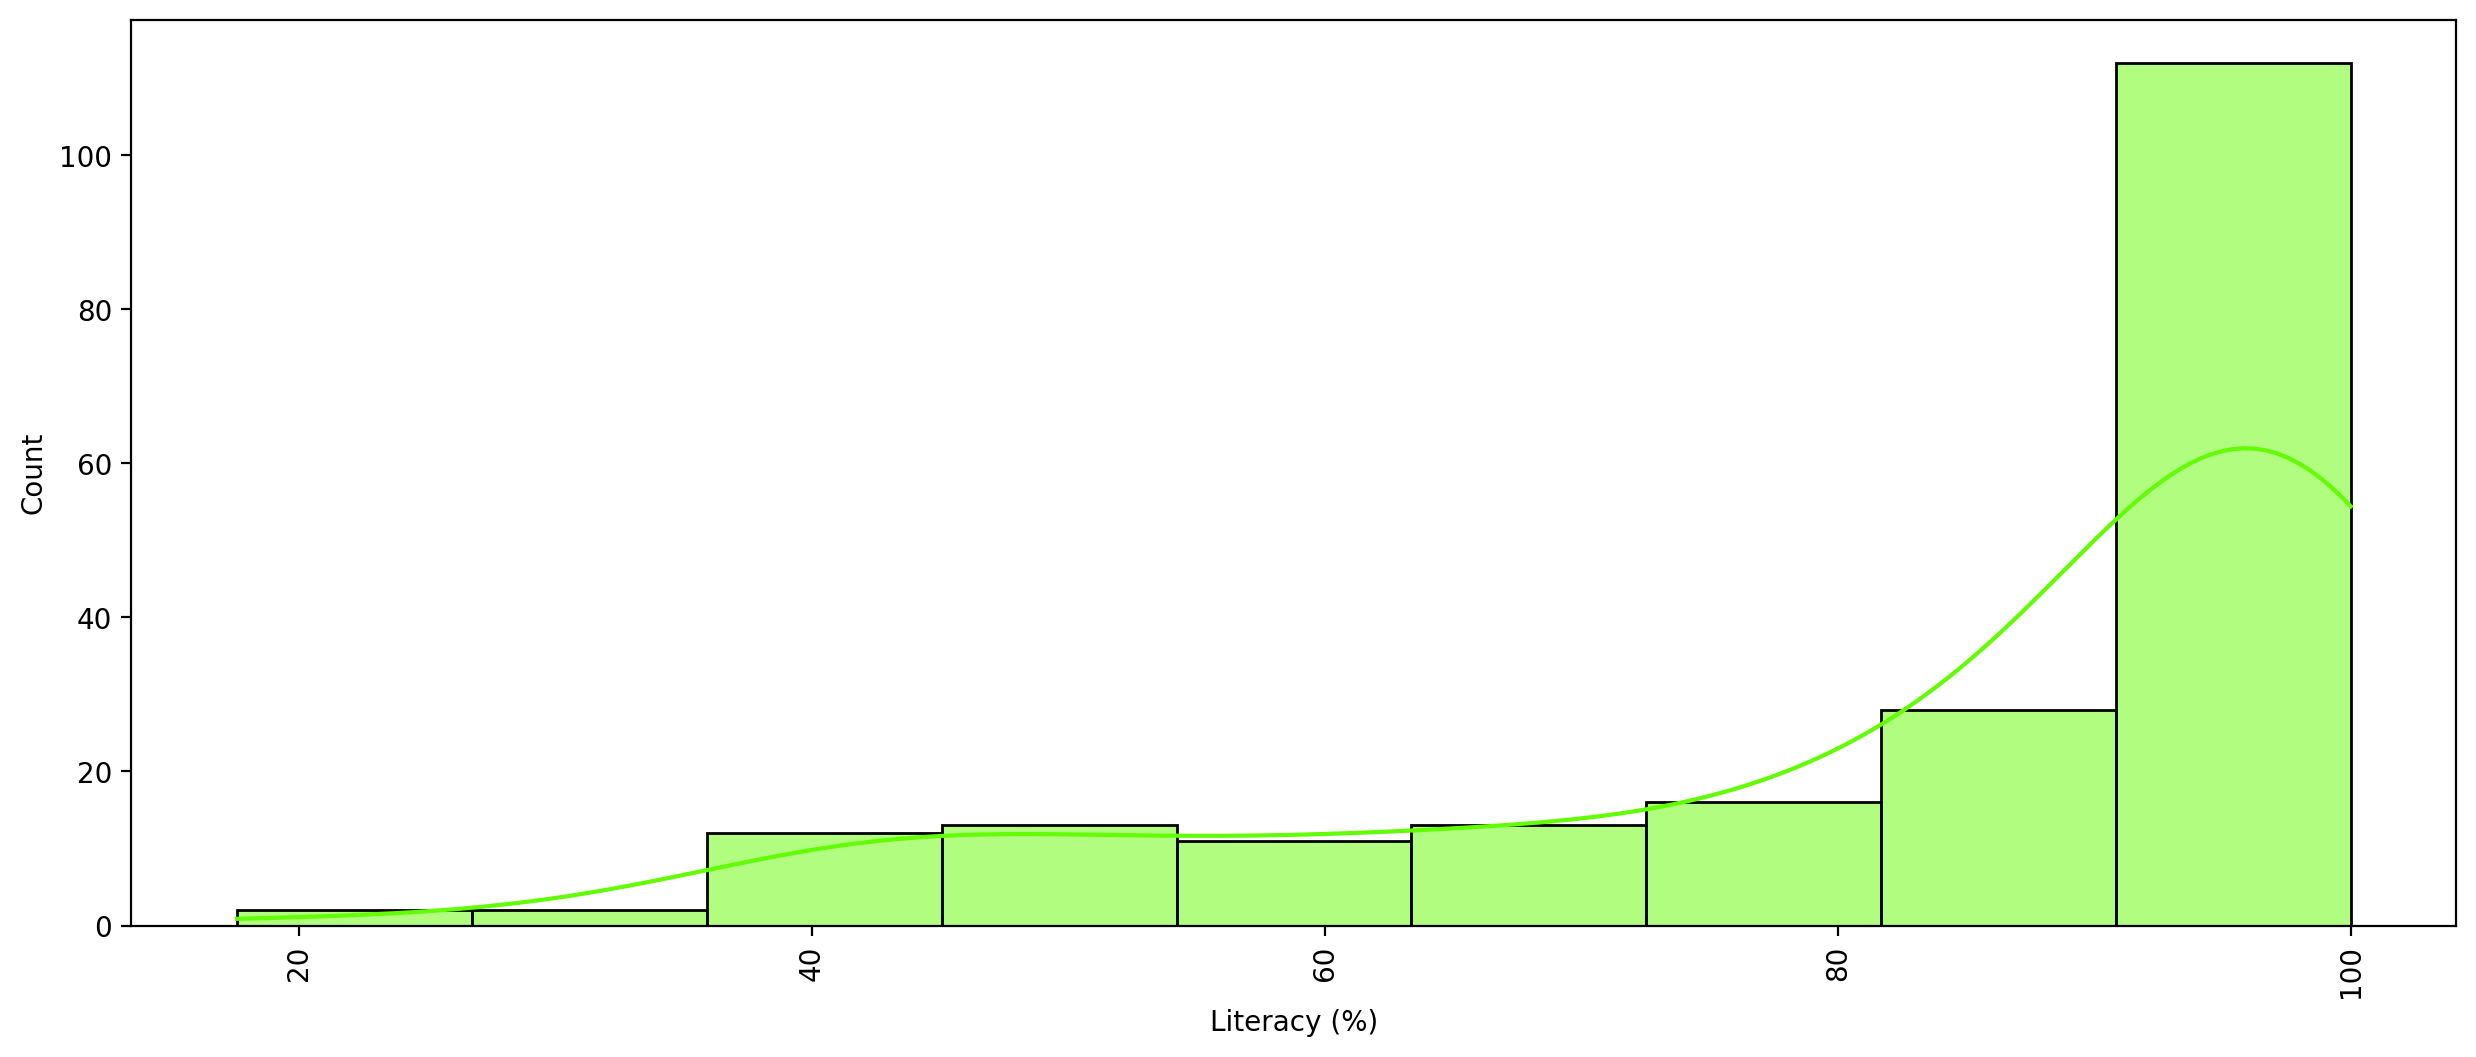

In [11]:
plt.figure(figsize=(15,6),dpi=200)
sns.histplot(data=df,x='Literacy (%)',kde=True,color='#62fc03')
plt.xticks(rotation=90);

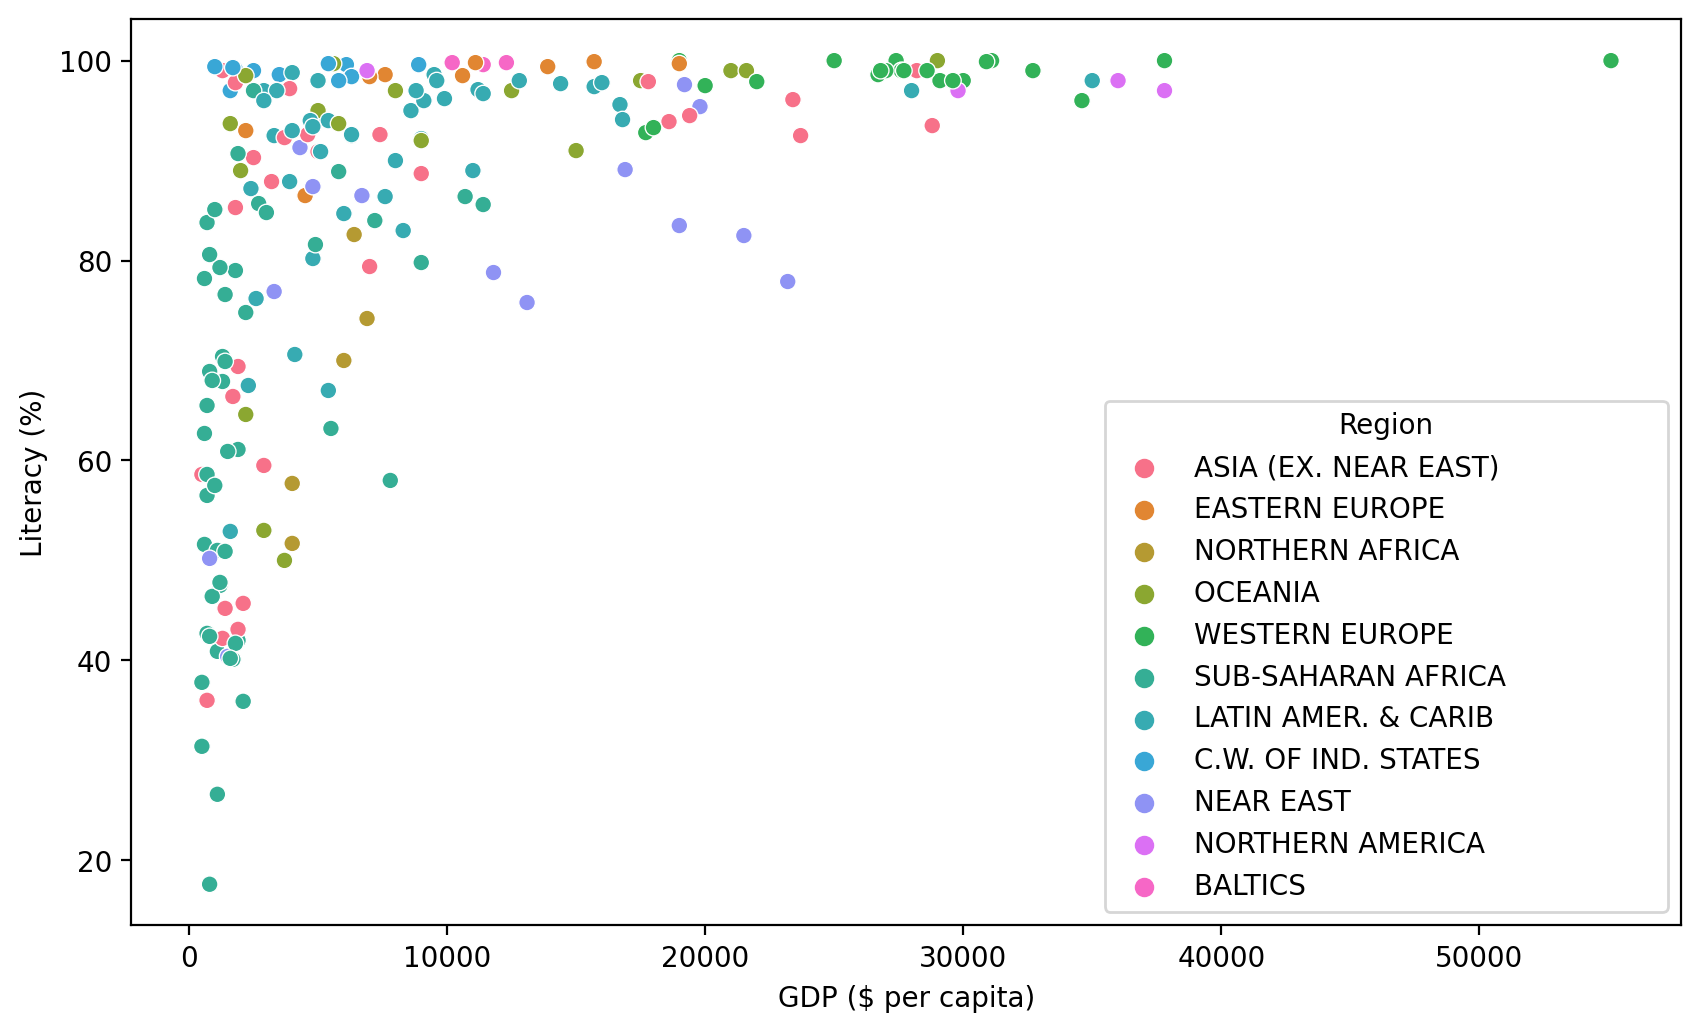

In [12]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,y='Literacy (%)',x='GDP ($ per capita)',hue='Region');

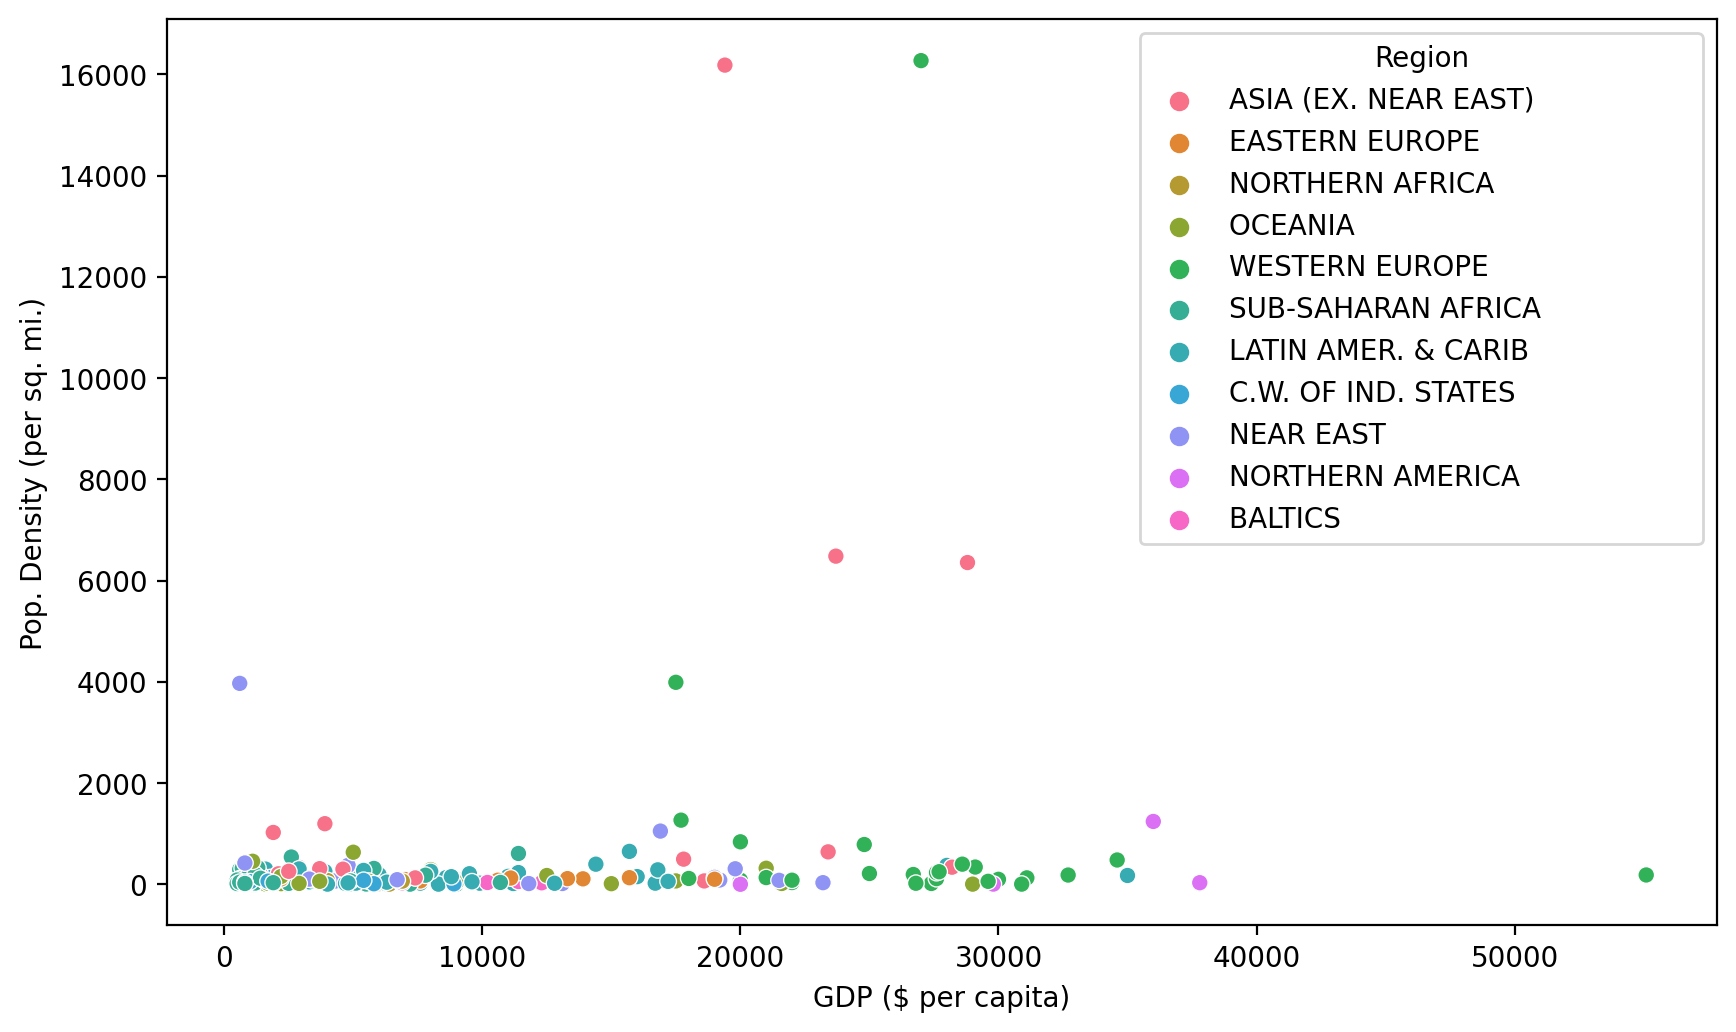

In [13]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,y='Pop. Density (per sq. mi.)',x='GDP ($ per capita)',hue='Region');

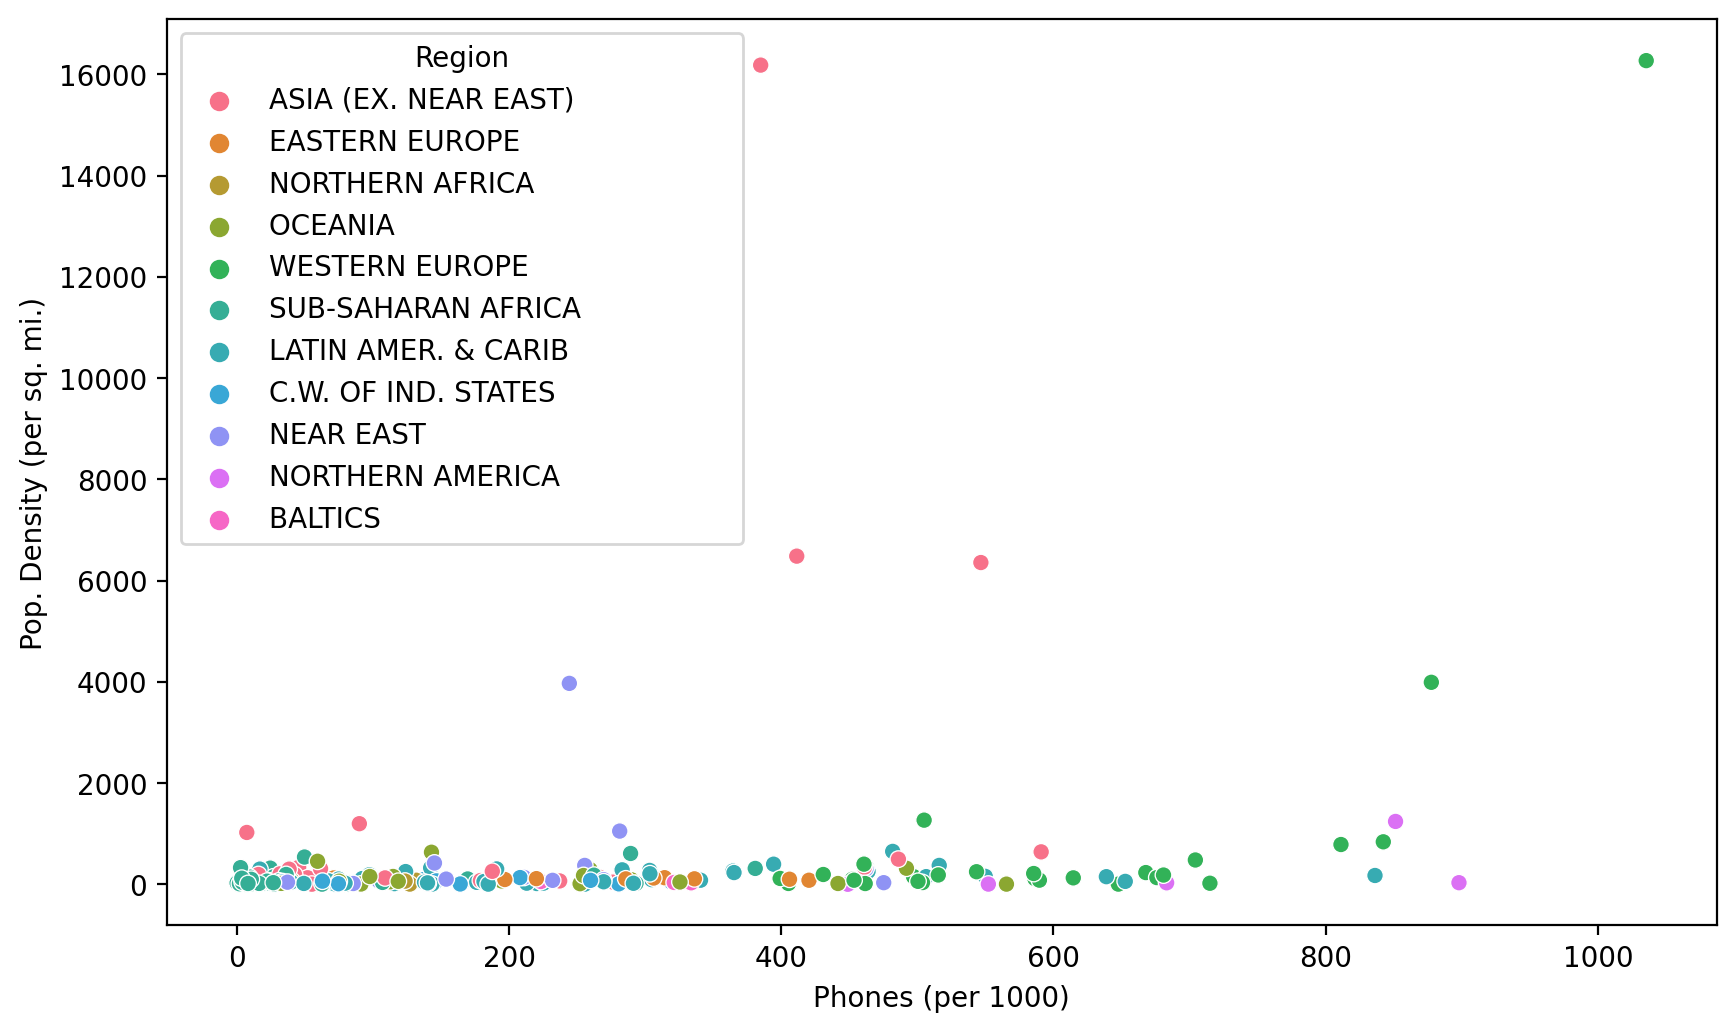

In [14]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,y='Pop. Density (per sq. mi.)',x='Phones (per 1000)',hue='Region');

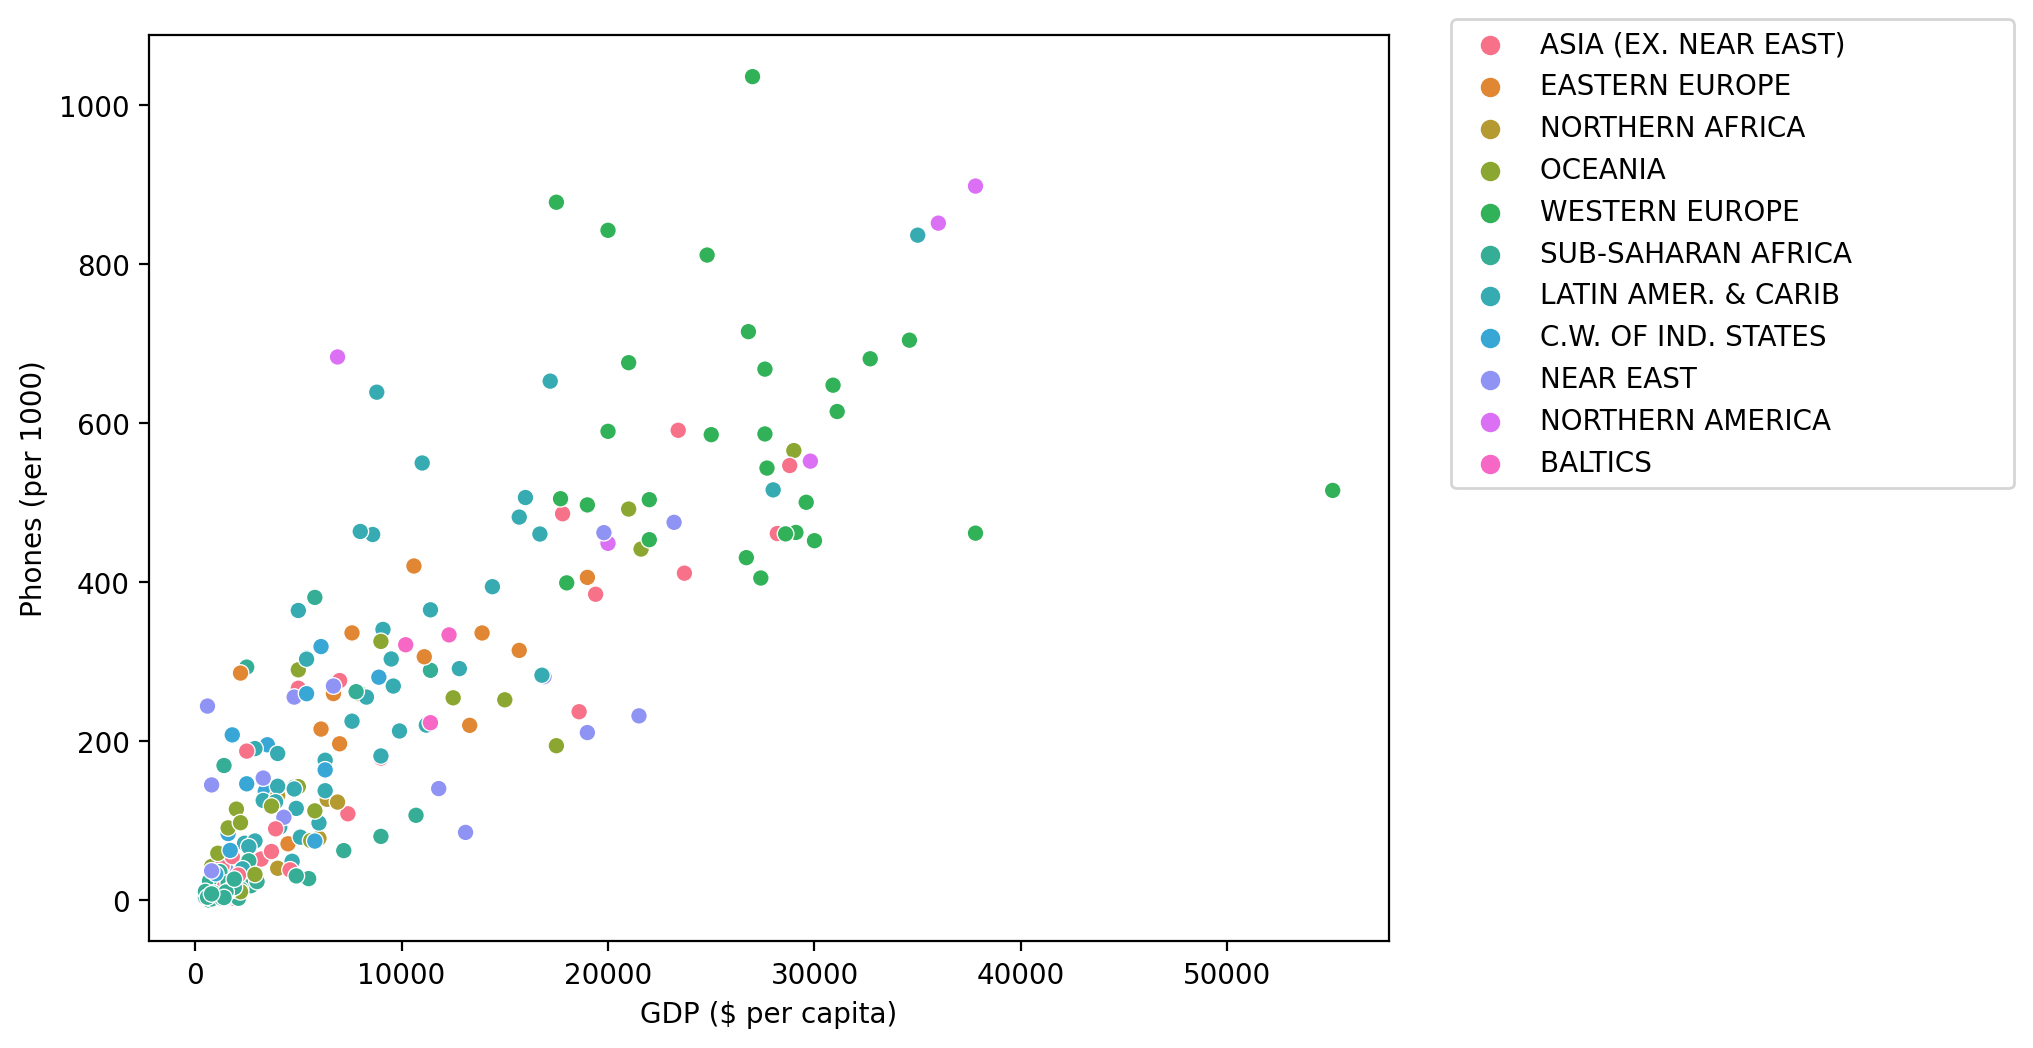

In [15]:
plt.figure(figsize=(8,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.legend(loc=(1.05,0.5));

In [16]:
plt.figure(figsize=(20,8),dpi=800)
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm');

<Figure size 120000x4800 with 0 Axes>

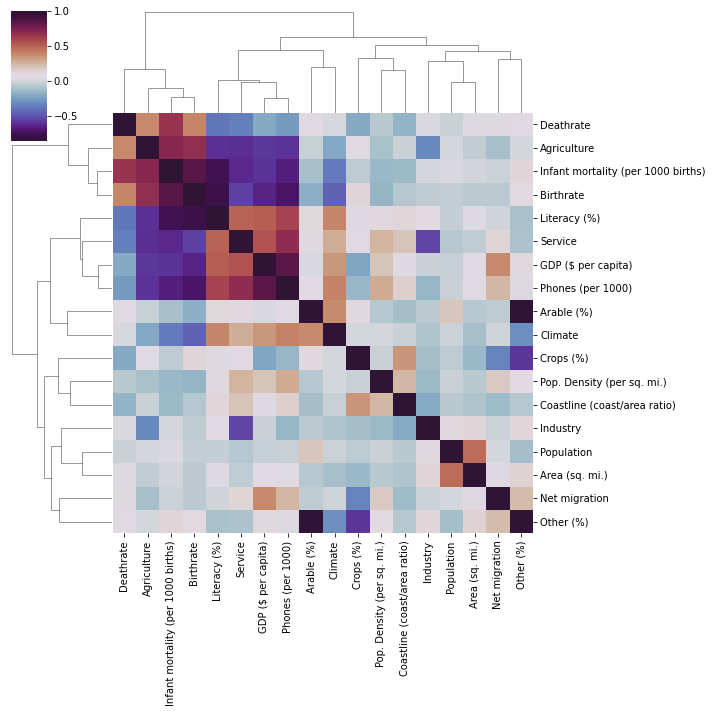

In [17]:
plt.figure(figsize=(200,8),dpi=600)
sns.clustermap(data=df.corr(),cmap='twilight_shifted');

## Data Preparation and Model Discovery

Let's now prepare our data for Kmeans Clustering!

### Missing Data

In [18]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [19]:
df[df['Agriculture'].isnull()]=df[df['Agriculture'].isnull()].fillna(0)

In [20]:
df[df['Agriculture'].isnull()]

Empty DataFrame
Columns: [Country, Region, Population, Area (sq. mi.), Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration, Infant mortality (per 1000 births), GDP ($ per capita), Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%), Climate, Birthrate, Deathrate, Agriculture, Industry, Service]
Index: []

In [21]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [22]:
# https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [23]:
# https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [24]:
df = df.dropna()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             221 non-null    object 
 1   Region                              221 non-null    object 
 2   Population                          221 non-null    int64  
 3   Area (sq. mi.)                      221 non-null    int64  
 4   Pop. Density (per sq. mi.)          221 non-null    float64
 5   Coastline (coast/area ratio)        221 non-null    float64
 6   Net migration                       221 non-null    float64
 7   Infant mortality (per 1000 births)  221 non-null    float64
 8   GDP ($ per capita)                  221 non-null    float64
 9   Literacy (%)                        221 non-null    float64
 10  Phones (per 1000)                   221 non-null    float64
 11  Arable (%)                          221 non-n

## Data Feature Preparation

In [26]:
X = df.drop('Country',axis=1)

In [27]:
X = pd.get_dummies(X)

### Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaled_X = scaler.fit_transform(X)

### Creating and Fitting Kmeans Model

In [31]:
from sklearn.cluster import KMeans

In [32]:
ssd = list()

for k in range(2,20):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)

    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method for KMeans')

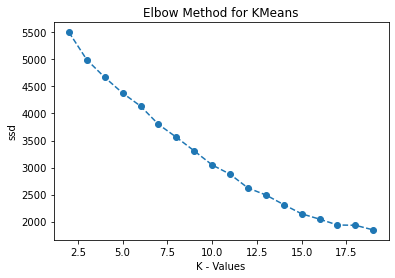

In [33]:
plt.plot(range(2,20),ssd,'--o')
plt.xlabel('K - Values')
plt.ylabel('ssd')
plt.title('Elbow Method for KMeans')

<AxesSubplot:>

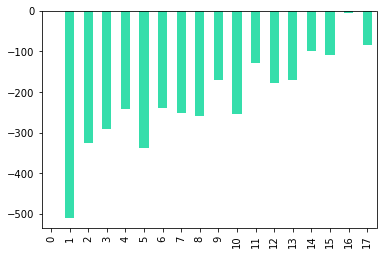

In [34]:
pd.Series(ssd).diff().plot(kind='bar',color='#35deab')

# Model Interpretation

In [35]:
modelf = KMeans(n_clusters=8)

In [36]:
modelf.fit(scaled_X)

KMeans()

In [37]:
modelf.labels_

array([0, 3, 7, 4, 2, 0, 7, 7, 7, 5, 7, 4, 2, 5, 7, 1, 6, 7, 5, 2, 7, 0,
       2, 6, 7, 3, 0, 7, 7, 6, 3, 0, 6, 0, 6, 0, 2, 7, 2, 0, 0, 7, 6, 7,
       0, 0, 0, 7, 0, 3, 7, 3, 2, 0, 7, 7, 7, 7, 7, 0, 0, 2, 0, 2, 4, 2,
       2, 7, 4, 0, 0, 1, 5, 2, 0, 2, 2, 7, 7, 7, 4, 7, 0, 0, 7, 7, 7, 6,
       3, 2, 6, 6, 6, 1, 2, 2, 1, 2, 7, 6, 2, 1, 5, 0, 4, 6, 6, 1, 5, 6,
       2, 1, 0, 0, 7, 2, 2, 2, 6, 3, 0, 0, 6, 6, 0, 2, 4, 7, 0, 7, 0, 7,
       4, 5, 6, 7, 7, 0, 0, 4, 6, 2, 7, 4, 4, 7, 0, 0, 4, 2, 1, 6, 4, 7,
       4, 7, 7, 6, 3, 2, 7, 1, 7, 3, 5, 0, 7, 7, 7, 7, 7, 4, 2, 4, 1, 0,
       7, 0, 6, 3, 3, 4, 0, 0, 2, 6, 0, 7, 0, 2, 2, 1, 6, 5, 0, 6, 0, 4,
       7, 7, 1, 5, 7, 4, 0, 5, 1, 2, 2, 7, 5, 4, 7, 6, 7, 4, 1, 7, 1, 0,
       0])

In [38]:
X['k=8 Cluster'] = modelf.labels_

<AxesSubplot:>

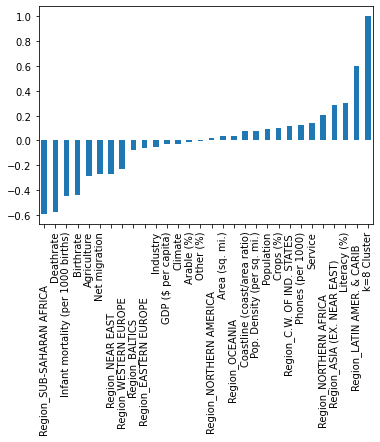

In [39]:
X.corr()['k=8 Cluster'].sort_values().plot(kind='bar')

In [40]:
! pip install plotly

In [41]:
iso_codes = pd.read_csv("country_iso_codes.csv")

In [42]:
iso_codes

Country  \
0                                        Afghanistan   
1    Akrotiri and Dhekelia – See United Kingdom, The   
2                                      Åland Islands   
3                                            Albania   
4                                            Algeria   
..                                               ...   
296                                 Congo, Dem. Rep.   
297                             Congo, Repub. of the   
298                                         Tanzania   
299                             Central African Rep.   
300                                    Cote d'Ivoire   

                                            ISO Code  
0                                                AFG  
1    Akrotiri and Dhekelia – See United Kingdom, The  
2                                                ALA  
3                                                ALB  
4                                                DZA  
..                                               ...  
296                                              COD  
297                                              COG  
298                                              TZA  
299                                              CAF  
300                                              CIV  

[301 rows x 2 columns]

In [43]:
isomap = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [44]:
isomap

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [45]:
df['ISO Code'] = df['Country'].map(isomap)

In [46]:
df['Clusters'] = modelf.labels_

In [47]:
df

Country                               Region  Population  \
0       Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1           Albania  EASTERN EUROPE                          3581655   
2           Algeria  NORTHERN AFRICA                        32930091   
3    American Samoa  OCEANIA                                   57794   
4           Andorra  WESTERN EUROPE                            71201   
..              ...                                  ...         ...   
222       West Bank  NEAR EAST                               2460492   
223  Western Sahara  NORTHERN AFRICA                          273008   
224           Yemen  NEAR EAST                              21456188   
225          Zambia  SUB-SAHARAN AFRICA                     11502010   
226        Zimbabwe  SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0            647500                        48.0                          0.00   
1             28748                       124.6                          1.26   
2           2381740                        13.8                          0.04   
3               199                       290.4                         58.29   
4               468                       152.1                          0.00   
..              ...                         ...                           ...   
222            5860                       419.9                          0.00   
223          266000                         1.0                          0.42   
224          527970                        40.6                          0.36   
225          752614                        15.3                          0.00   
226          390580                        31.3                          0.00   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0            23.06                              163.07               700.0   
1            -4.93                               21.52              4500.0   
2            -0.39                               31.00              6000.0   
3           -20.71                                9.27              8000.0   
4             6.60                                4.05             19000.0   
..             ...                                 ...                 ...   
222           2.98                               19.62               800.0   
223           0.00                                0.00                 0.0   
224           0.00                               61.50               800.0   
225           0.00                               88.29               800.0   
226           0.00                               67.69              1900.0   

     Literacy (%)  ...  Crops (%)  Other (%)  Climate  Birthrate  Deathrate  \
0       36.000000  ...       0.22      87.65      1.0      46.60      20.34   
1       86.500000  ...       4.42      74.49      3.0      15.11       5.22   
2       70.000000  ...       0.25      96.53      1.0      17.14       4.61   
3       97.000000  ...      15.00      75.00      2.0      22.46       3.27   
4      100.000000  ...       0.00      97.78      3.0       8.71       6.25   
..            ...  ...        ...        ...      ...        ...        ...   
222     79.521429  ...      18.97      64.13      3.0      31.67       3.92   
223      0.000000  ...       0.00      99.98      1.0       0.00       0.00   
224     50.200000  ...       0.24      96.98      1.0      42.89       8.30   
225     80.600000  ...       0.03      92.90      2.0      41.00      19.93   
226     90.700000  ...       0.34      91.34      2.0      28.01      21.84   

     Agriculture  Industry  Service  ISO Code  Clusters  
0          0.380     0.240    0.380       AFG         0  
1          0.232     0.188    0.579       ALB         3  
2          0.101     0.600    0.298       DZA         7  
3          0.000     0.000    0.000       ASM         4 

In [48]:
import plotly.express as px

fig = px.choropleth(df, locations='ISO Code',
                    color='Clusters', # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

-------------------